In [1]:
import numpy as np
import bordado as bd
import matplotlib.pyplot as plt

## Gerar dado sintético

$g_z = \frac{Gm(z-z_c)}{((x-x_c)^2+(y-y_c)^2+(z-z_c)^2)}$

$x,y: 10km - 50km$

$z: 0$

$G = 6.6743×10−11$

In [2]:
def model(G,x,y,z,x_c,y_c,z_c,m):
    return (G*m*(z-z_c))/((np.sqrt((x-x_c)**2+(y-y_c)**2+(z-z_c)**2))**3) * 1e9

In [3]:
G = 6.6743e-11
region = [10e3, 50e3, 10e3, 50e3]
x, y = bd.random_coordinates(region, size=1000, random_seed=42)
z = np.zeros_like(x)
x_c = 7e3
y_c = 5e3
z_c = -1.5e3
m = 1.5e3

data =  model(G,m,x,y,z,x_c,y_c,z_c)

In [4]:
def jacobian(G,x,y,z,x_c,y_c,z_c,m):
    sqrt = np.sqrt(((x-x_c)**2)+((y-y_c)**2)+((z-z_c)**2))
    sqrt_3 = sqrt**3
    sqrt_5 = sqrt**5
    N = x.size
    M = 4
    dx = (3*G*m*(x-x_c)*(z-z_c))/sqrt_5 * 1e9 # Conversão de unidades
    dy = (3*G*m*(y-y_c)*(z-z_c))/sqrt_5 * 1e9 # Conversão de unidades
    dz = ((3*G*m*(z-z_c)**2)/sqrt_5)-((G*m)/sqrt_3) * 1e9 # Conversão de unidades
    dm = (G*(z-z_c))/sqrt_3 * 1e9 # Conversão de unidades

    jacobian = np.empty((N, M))

    jacobian[:, 0] = dx
    jacobian[:, 1] = dy
    jacobian[:, 2] = dz
    jacobian[:, 3] = dm

    return jacobian

In [5]:
def inversão_newton(p, dados, G,x,y,z,max_iterações=500, tolerância=0.1):    
    M = p.size
    residuo = dados - model(G,x,y,z,*p)
    funcao_objetivo = [np.linalg.norm(residuo)**2]
    for iteracao in range(max_iterações):
        A = jacobian(G,x,y,z,*p)
        H = A.T @ A
        d = np.diagonal(H)
        R = np.diag(1/np.abs(d))
        delta_p = np.linalg.solve(R@A.T @ A,R@ A.T @ residuo)
        p = p + delta_p
        residuo = dados - model(G,x,y,z,*p)
        funcao_objetivo.append(np.linalg.norm(residuo)**2)
        if (funcao_objetivo[-1]-funcao_objetivo[-2])/funcao_objetivo[-2] < tolerância:
            break
    return p, funcao_objetivo

In [28]:

p_inicial = np.array([5e3,4e3,-3e3,1e3])
dados_ruido = data + np.random.default_rng().normal(0, 0.5e-7, data.size)
p_newton, objetivo_newton = inversão_newton(p_inicial, dados_ruido, G,x,y,z)
dados_preditos = model(G,x,y,z,*p_inicial)

print(p_newton)

[ 4.04368028e+04 -1.08153595e+03  3.03229424e+07  1.00966160e+07]


In [7]:
print(*p_inicial)

5000.0 4000.0 -3000.0 1000.0


In [8]:
A = jacobian(G,x,y,z,*p_inicial)
A

array([[ 3.08688636e-13,  7.28194344e-14, -1.31053945e-12,
         3.93161835e-12],
       [ 3.30273190e-13,  3.56269420e-13, -1.80548335e-12,
         5.41645005e-12],
       [ 2.03832378e-13,  5.78237904e-14, -9.67952688e-13,
         2.90385806e-12],
       ...,
       [ 8.91248375e-13,  3.39565949e-12, -7.99954049e-12,
         2.39986215e-11],
       [ 3.46420565e-14,  3.08423162e-14, -3.09451102e-13,
         9.28353305e-13],
       [ 3.15458585e-13,  5.20773145e-13, -2.13942511e-12,
         6.41827534e-12]])

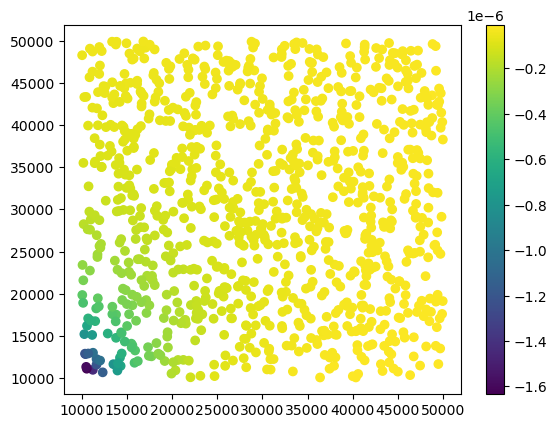

In [9]:
plt.scatter(x,y,c=data )
plt.colorbar()

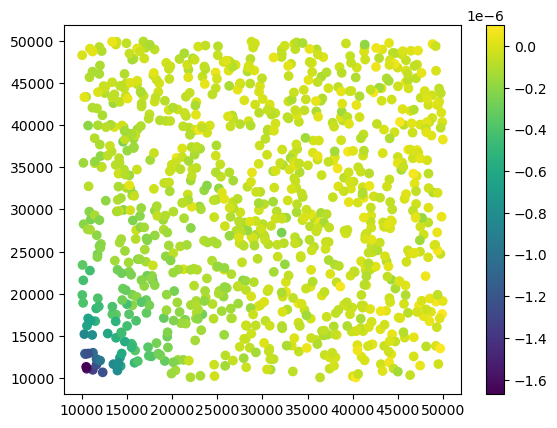

In [10]:
plt.scatter(x,y,c=dados_ruido )
plt.colorbar()

In [11]:
print(dados_ruido)

[-7.00844549e-10 -6.11202481e-08  3.70392928e-08 -1.01237733e-07
 -9.02791280e-08 -2.21935651e-08 -1.88174579e-08 -4.40464460e-08
 -2.04177994e-09 -1.22881692e-07 -2.38053146e-08  3.74723403e-09
 -7.58929282e-08 -8.75243745e-08 -6.19395718e-08 -3.16715552e-07
 -3.55085101e-08 -1.03921362e-07 -3.60375944e-08 -7.89304024e-08
 -1.09822899e-07 -2.13254874e-08  4.49753256e-08 -3.86519988e-09
 -2.90039160e-08 -1.85447131e-07 -9.06928507e-08 -2.80537302e-07
 -1.44712299e-07 -6.88749395e-08  1.59012122e-09  1.79379485e-08
 -1.55094771e-07  4.60625974e-08  4.88549910e-09 -1.36251486e-07
 -1.37531996e-07 -4.01249446e-08 -1.08341162e-07 -1.26309658e-07
 -4.26727062e-08 -4.89992233e-09 -2.11348498e-08 -1.13488095e-07
  1.85395144e-08 -4.73273863e-08 -1.45312805e-07 -6.72675723e-08
 -1.96230079e-08 -2.47604109e-07 -4.40953875e-08 -8.45232565e-07
 -5.83675663e-09 -8.90056049e-08 -6.41213296e-08 -8.61516651e-08
 -1.03488680e-07 -9.98686774e-08 -1.02104929e-07 -2.52320440e-07
  8.51583351e-09  3.38288